## Chapter 7. Nonlinear Regression Models

In [70]:
from rpy2 import robjects
from rpy2.robjects.packages import importr, data
import os
import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [147]:
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 1000x750 with 0 Axes>

In [71]:
base = importr('base')
set_seed = robjects.r("set.seed")
APM = importr('AppliedPredictiveModeling')
APMdatafolder = os.path.expanduser("~/Documents/dataset/AppliedPredictiveModeling/data")
os.path.isdir(APMdatafolder)

True

In [72]:
data_filename='solubility.RData'
file_path = os.path.join(APMdatafolder, data_filename)
datadict = pyreadr.read_r(file_path)

In [73]:
solTestX, solTestXtrans, solTestY, solTrainX, solTrainXtrans, solTrainY \
= datadict['solTestX'], datadict['solTestXtrans'], datadict['solTestY'], datadict['solTrainX'], datadict['solTrainXtrans'], datadict['solTrainY']

In [74]:
trainX, trainY = solTrainXtrans, solTrainY
testX, testY = solTestXtrans, solTestY

### 1. Multivariate Adaptive Regression Splines

In [76]:
np.int =int
np.float = float

from pyearth import Earth

In [77]:
criteria = ('rss', 'gcv', 'nb_subsets')
mars = Earth(feature_importance_type=criteria)
mars.fit(trainX,trainY)

/Users/chenxu/miniconda3/lib/python3.10/site-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/chenxu/miniconda3/lib/python3.10/site-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-macosx-10.9-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(feature_importance_type=('rss', 'gcv', 'nb_subsets'))

In [78]:
print(mars.summary())

Earth Model
---------------------------------------------------
Basis Function                Pruned  Coefficient  
---------------------------------------------------
(Intercept)                   No      2.83653      
h(MolWeight-5.90236)          Yes     None         
h(5.90236-MolWeight)          No      1.16464      
h(SurfaceArea1-13.4174)       No      0.672839     
h(13.4174-SurfaceArea1)       No      -0.317899    
NumNonHAtoms                  No      -2.60584     
FP142                         No      0.758487     
FP074                         No      0.206803     
FP206                         Yes     None         
FP135                         No      0.584763     
h(MolWeight-4.87718)          Yes     None         
h(4.87718-MolWeight)          No      -0.700398    
FP083                         No      -0.647384    
h(NumAromaticBonds-2.94444)   No      -5.77111     
h(2.94444-NumAromaticBonds)   No      0.892551     
FP172                         No      -0.460185    


In [63]:
print(mars.summary_feature_importances('rss'))

                      rss    gcv    nb_subsets
SurfaceArea1          0.45   0.46   0.05          
NumNonHAtoms          0.37   0.38   0.03          
FP142                 0.04   0.04   0.03          
MolWeight             0.02   0.02   0.13          
FP173                 0.02   0.02   0.03          
FP135                 0.01   0.01   0.03          
FP059                 0.01   0.01   0.03          
FP083                 0.01   0.01   0.03          
NumAromaticBonds      0.01   0.01   0.05          
FP002                 0.01   0.00   0.03          
FP172                 0.00   0.00   0.03          
FP154                 0.00   0.00   0.03          
FP176                 0.00   0.00   0.03          
NumRotBonds           0.00   0.00   0.05          
FP164                 0.00   0.00   0.03          
FP053                 0.00   0.00   0.03          
FP202                 0.00   0.00   0.03          
FP081                 0.00   0.00   0.03          
FP188                 0.00   0.00  

/Users/chenxu/miniconda3/lib/python3.10/site-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-macosx-10.9-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/chenxu/miniconda3/lib/python3.10/site-packages/sklearn_contrib_py_earth-0.1.0+0.gb209d19.dirty-py3.10-macosx-10.9-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Text(0, 0.5, 'Log Solubility')

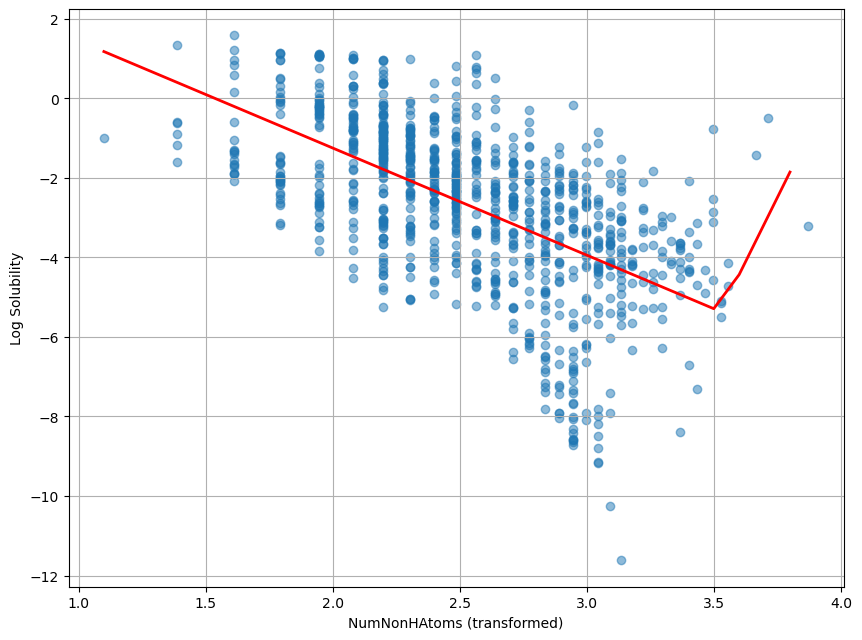

In [150]:
featureName = 'NumNonHAtoms'
mars = Earth()
mars.fit(trainX[featureName], trainY)

c_trainX = np.arange(np.min(trainX[featureName]), np.max(trainX[featureName]), 0.1)
mars_predict = mars.predict(c_trainX)

plt.scatter(trainX[featureName], trainY, alpha=0.5)
plt.plot(c_trainX, mars_predict, 'r', linewidth=2)
plt.xlabel(featureName+' (transformed)')
plt.ylabel('Log Solubility')

### 2. Support Vector Machines

In [81]:
from sklearn.svm import SVR

In [83]:
opt_sigma = 0.0039

svr = SVR(kernel='rbf', gamma=opt_sigma, epsilon=0.1)
svr_params = {
    'C': np.logspace(-2, 11, num=14, base=2),
}
print(svr_params)

{'C': array([2.500e-01, 5.000e-01, 1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00,
       1.600e+01, 3.200e+01, 6.400e+01, 1.280e+02, 2.560e+02, 5.120e+02,
       1.024e+03, 2.048e+03])}


In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 10, test_size = 0.1, random_state=3)

gs_svr = GridSearchCV(svr, svr_params, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
gs_svr.fit(trainX, trainY['solTrainY'])

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=3, test_size=0.1, train_size=None),
             estimator=SVR(gamma=0.0039), n_jobs=-1,
             param_grid={'C': array([2.500e-01, 5.000e-01, 1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00,
       1.600e+01, 3.200e+01, 6.400e+01, 1.280e+02, 2.560e+02, 5.120e+02,
       1.024e+03, 2.048e+03])},
             scoring='neg_mean_squared_error')

Text(0, 0.5, 'RMSE (Cross-Validation)')

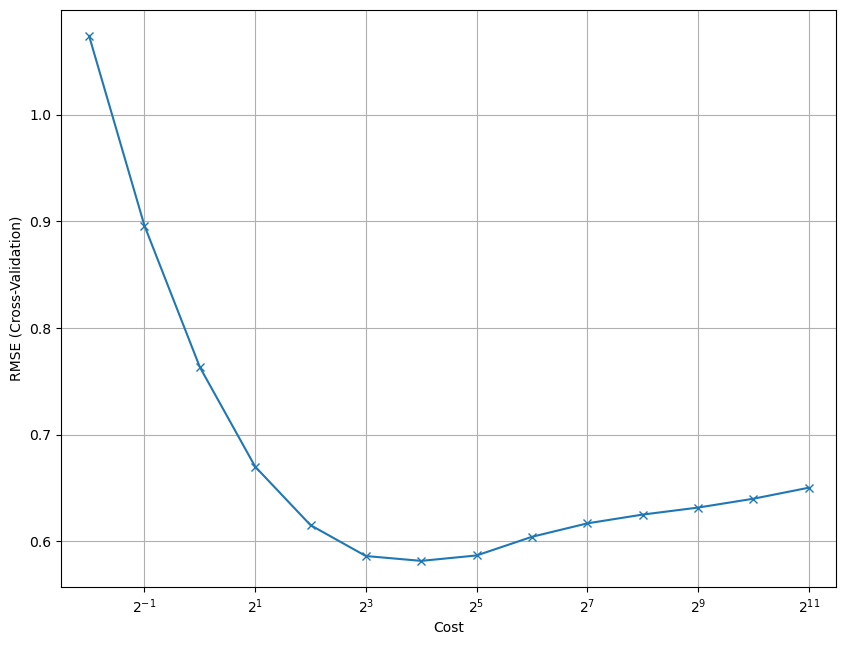

In [149]:
gs_grid_rmse = np.sqrt(-gs_svr.cv_results_['mean_test_score'])

plt.plot(np.logspace(-2, 11, num=14, base=2), gs_grid_rmse, '-x')
plt.xscale('log', base=2)
plt.xlim(2**-2.5, 2**11.5)
plt.xlabel('Cost')
plt.ylabel('RMSE (Cross-Validation)')

In [111]:
print(f"Best cost value associated with the smallest RMSE was {gs_svr.best_params_['C']}")

Best cost value associated with the smallest RMSE was 16.0


In [112]:
svr_poly = SVR(kernel='poly', epsilon=0.1)

svr_poly_params = {
    'C': np.logspace(-2, 5, num=8, base=2),
    'gamma': [0.001, 0.005, 0.01],
    'degree': [1, 2]
}

In [113]:
gs_svr_poly = GridSearchCV(svr_poly, svr_poly_params, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
gs_svr_poly.fit(trainX, trainY['solTrainY'])

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=3, test_size=0.1, train_size=None),
             estimator=SVR(kernel='poly'), n_jobs=-1,
             param_grid={'C': array([ 0.25,  0.5 ,  1.  ,  2.  ,  4.  ,  8.  , 16.  , 32.  ]),
                         'degree': [1, 2], 'gamma': [0.001, 0.005, 0.01]},
             scoring='neg_mean_squared_error')

In [145]:
def getRMSE(scale, degree):
    mse_scores = gs_svr_poly.cv_results_['mean_test_score']
    paramsList = gs_svr_poly.cv_results_['params']
    m = mse_scores[[x for x in range(48) if (paramsList[x]['degree']==degree)&(paramsList[x]['gamma']==scale)]]
    return np.sqrt(-m)

Text(0.5, 0.07, 'Cost')

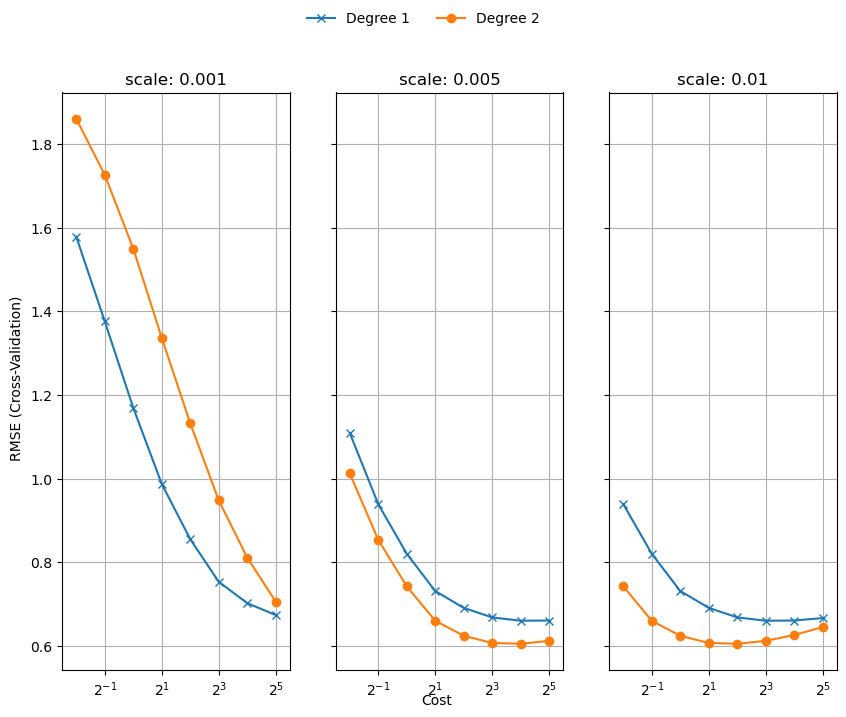

In [148]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

line1, = ax1.plot(np.logspace(-2, 5, num=8, base=2), getRMSE(0.001, 1), '-x')
line2, = ax1.plot(np.logspace(-2, 5, num=8, base=2), getRMSE(0.001, 2), '-o')
ax1.set_xscale('log', base=2)
ax1.set_xlim(2**-2.5, 2**5.5)
ax1.set_title('scale: 0.001')

ax2.plot(np.logspace(-2, 5, num=8, base=2), getRMSE(0.005, 1), '-x')
ax2.plot(np.logspace(-2, 5, num=8, base=2), getRMSE(0.005, 2), '-o')
ax2.set_xscale('log', base=2)
ax2.set_xlim(2**-2.5, 2**5.5)
ax2.set_title('scale: 0.005')

ax3.plot(np.logspace(-2, 5, num=8, base=2), getRMSE(0.01, 1), '-x')
ax3.plot(np.logspace(-2, 5, num=8, base=2), getRMSE(0.01, 2), '-o')
ax3.set_xscale('log', base=2)
ax3.set_xlim(2**-2.5, 2**5.5)
ax3.set_title('scale: 0.01')

fig.legend([line1, line2], ('Degree 1', 'Degree 2'), loc='upper center', ncol=2, frameon=False)
fig.text(0.08, 0.5, 'RMSE (Cross-Validation)', ha='center', va='center', rotation=90)
fig.text(0.5, 0.07, 'Cost', ha='center', va='center')

### 3. K-Nearest Neighbors

In [151]:
cv

ShuffleSplit(n_splits=10, random_state=3, test_size=0.1, train_size=None)

In [152]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor()

knn_params = {
    'n_neighbors': np.arange(1, 21, 1)
}
gs_knnreg = GridSearchCV(knnreg, knn_params, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
gs_knnreg.fit(trainX, trainY)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=3, test_size=0.1, train_size=None),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='neg_mean_squared_error')

In [156]:
gs_knnreg_rmse = np.sqrt(-gs_knnreg.cv_results_['mean_test_score'])

array([1.086672  , 0.97206187, 0.9403347 , 0.9575708 , 0.94982129,
       0.97283737, 0.98973576, 1.00057506, 1.01850209, 1.03342659,
       1.04494322, 1.05596616, 1.0696947 , 1.08077149, 1.08997419,
       1.10124563, 1.11050366, 1.1226005 , 1.12907766, 1.13701822])

Text(0, 0.5, 'RMSE (Cross-Validation)')

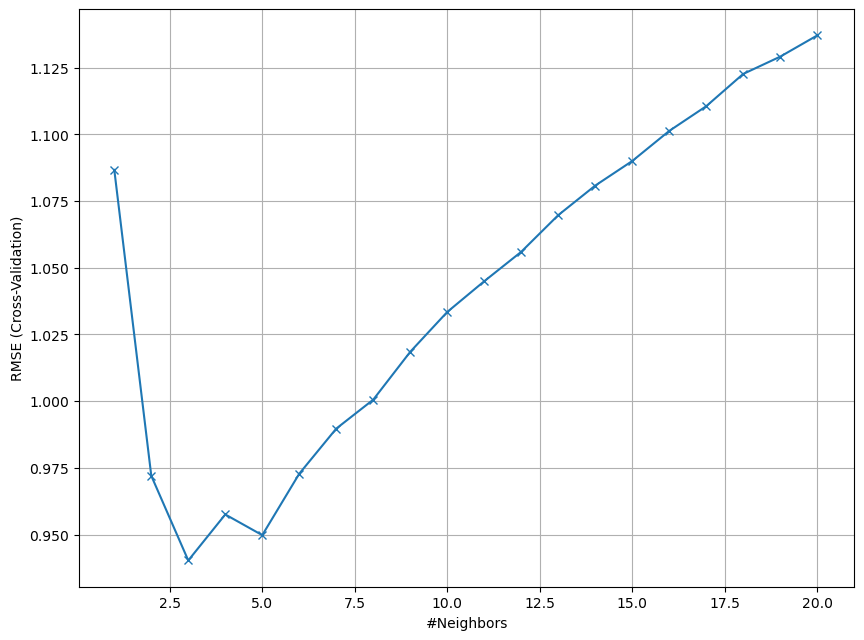

In [157]:
plt.plot(np.arange(1, 21, 1), gs_knnreg_rmse, '-x')
plt.xlim(None, 21)
plt.xlabel('#Neighbors')
plt.ylabel('RMSE (Cross-Validation)')